# Maps and data on maps visualisations 


Created on Sun Apr 21 18:33:02 2019

@author: liubov
project is open for collaborations


project is inspired by Unicef school mapping project and 
Lecturers without borders project at CRI www.scied.network 




# Input: 
we have N data-points on a world map, which come from the database (which is updated online e.g. verified users can add points on map).
The example files .csv 
<img src="map.png" alt="Drawing" style="width: 200px;"/>

As an example we put here the openstreetmap file from openstreet map project for mapping of educational institutions around the world.  The problem with it is that because of the sensitive data in the file we cannot make it visible for people, however we want the following output.

# Output: 
The unverified users cannot see the input datapoints (which is not shown for privacy reasons), but the map with colored countries, using https://www.d3-graph-gallery.com/bubblemap.html 
according to the input of database





We plot the world map using geopandas module.
Geopandas provides a high-level interface to the matplotlib library for making maps. Mapping shapes is as easy as using the plot() method on a GeoSeries or GeoDataFrame

To read more about this amazing cartopy feature go to https://geopandas.readthedocs.io/en/latest/mapping.html


'\nNow we color the world with colors per country as number of datapoints\nWarning: some errors due to missing values in some countries\n'

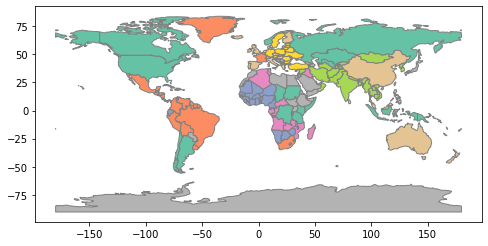

In [28]:


import numpy as np
import pandas as pd
import geopandas as gpd

import csv
from collections import OrderedDict
import networkx as nx
from descartes import PolygonPatch


import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeat
import cartopy.crs as ccrs
from zipfile import ZipFile


#from mpl_toolkits.basemap import Basemap
#import matplotlib.pyplot as plt
##################################
"""
Function for analysis and visualisations of datapoints on a map
"""

# Example files put in pandas format with header
#airport_col = ['ID', 'Name', 'City', 'Country','IATA', 'ICAO', 'Lat', 'Long', 'Alt', 
#               'Timezone', 'DST', 'Tz database time zone', 'type', 'source']


def plot_on_map(lat,lon):
    
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines()
    
    ll_to_pixel = ccrs.Geodetic()._as_mpl_transform(ax)
    
    # We need to call draw to ensure that the axes location has been defined
    # fully. 
    plt.draw()
    
    # Now lets figure out the pixel coordinate of the city.
    x1_pix, y1_pix = ll_to_pixel.transform_point([151.2111, -33.8600])
    x2_pix, y2_pix = ll_to_pixel.transform_point([101.2111, -33.8600])
    
    # We can even plot these pixel coordinates directly with matplotlib.
    plt.plot(x1_pix, y1_pix, 'ob', markersize=25, transform=None)
    plt.plot(x2_pix, y2_pix, 'ob', markersize=25, transform=None)
    
    #plt.savefig('figure_1.png', dpi=plt.gcf().get_dpi())
    plt.show()    


def arr_school(data): #calculate array of schools in the same country
    N_school_country = data['country'].nunique() #estimate number of various schools
    arr_schools = np.zeros(N_school_country)
    for ind in range(0,N_school_country):
        arr_schools[ind] = data[ind] #arr_schools[ind] = data.iloc('country' = country_i)
        

def plot_on_map(data,arr_schools):
    plot(basemap)
    plot(arr_schools,earth) #plot arr_schools for each country on earth 
    
    
def plot_basemap():
    print('plotting basemap')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines()
    
    ll_to_pixel = ccrs.Geodetic()._as_mpl_transform(ax)
    
    # We need to call draw to ensure that the axes location has been defined
    # fully. 
    plt.draw()  
    
    
def highlight_country(country):
    '''
    Now we highlight country on the world map
    As the example we put here 
    country = USA
    '''
    country = 'USA'
    ax = plt.axes(projection=ccrs.PlateCarree())
    #ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    #ax.add_feature(cartopy.feature.COASTLINE)
    #ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
    #ax.add_feature(cartopy.feature.LAKES, alpha=0.95)
    #ax.add_feature(cartopy.feature.RIVERS)
    ax.set_extent([-150, 60, -25, 60])
    
    
    shpfilename = shpreader.natural_earth(resolution='110m',
                                          category='cultural',
                                          name='admin_0_countries')
    reader = shpreader.Reader(shpfilename)
    countries = reader.records()
    print('plotting basemap per country')
    
    for country in countries:
        if country.attributes['ADM0_A3'] == country:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                              facecolor=(0, 0, 1),
                              label=country.attributes['ADM0_A3'])
        else:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                              facecolor=(0, 1, 0),
                              label=country.attributes['ADM0_A3'])
    plt.show()   
    
    

def plot_country_color( axes, country_name, fcolor ):
    '''
    plot each country in specific color with provided axes
    '''
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))

    
    
'''
Now we plot the whole world
'''
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )
#another way to plot the world map
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

'''
Now we color the world with colors per country as number of datapoints
Warning: some errors due to missing values in some countries
'''
#for index, row in data.iterrows(): 
#    print (row["source_iso3"], row["estimated_trips"])
#    plot_country_color(ax2, row["source_iso3"], row["estimated_trips"])



number of rows
92
data preprocessing
Latitude,Longitude,Name,Street,City,State,Country,Zipcode,Color,Photo;URL,Description,Email,Phone,Website;Details;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;    48.135125,11.581981,Maths-physics-literature;c...
Name: 0, dtype: object
Latitude,Longitude,Name,Street,City,State,Country,Zipcode,Color,Photo;URL,Description,Email,Phone,Website;Details;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;    German,;Russian;languages;;;;;;;;;;;;;;;;;;;;;...
Name: 1, dtype: object
plotting basemap


b'Skipping line 117: expected 1 fields, saw 31\nSkipping line 118: expected 1 fields, saw 3\n'
C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


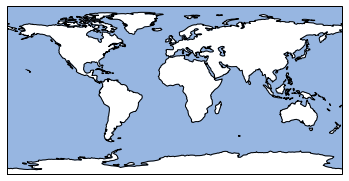

In [22]:

###########OPEN data FILE###################


#for printing the data
i=0
with open('randomized_edu_data_Nov_2018.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        i = i+1#print(row)
        
print('number of rows')        
print(i)        
csvFile.close()

"""
We create dataframe object from csv file with datapoints around the world file files put in pandas format with header
"""
data = pd.read_csv("randomized_edu_data_Nov_2018.csv", error_bad_lines=False, delim_whitespace =True)#,names = col_H)


print('data preprocessing')
print('example of randomized data')
data.head()
print(data.iloc[0])
print(data.iloc[1])

print('plotting the basemap')
plot_basemap()



#we first do data analysis of the csv file we uploaded

print('extracting column from data table')
Column_tags = data.set_index('schools', drop = False)

N_schools = data['schools'].nunique() #estimate number of various schools
N_schools = data['country'].nunique() #estimate number of different countries

print('number of different categories')
#N_tags = len(array_unique_tags_df(df_all))
print(N_schools)

#then we can do some data visualisation of educational institutions
print('plotting countries colors according to the number of educational institutions in the map')
#highlight_country(country)
# then plot some countries on with color encoded in estimated_trips
for index, row in data_2014.iterrows(): 
    print (row["source_iso3"], row["estimated_trips"])
    plotCountryPatch(ax2, row["source_iso3"], row["estimated_trips"])




There is another way to visualise data points on a map.

One can see here 
https://python-graph-gallery.com/313-bubble-map-with-folium/